<a href="https://colab.research.google.com/github/ShahzebFarruk/SYSC_5500_DDoS_Attack_Detection_Using_ML_Grp_6/blob/main/SVM_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DDoS Train Data(Test+).csv to DDoS Train Data(Test+).csv


In [2]:
import io
import pandas as pd
dftr = pd.read_csv(io.BytesIO(uploaded['DDoS Train Data(Test+).csv']))

In [3]:
dftr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Column43
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


In [5]:
pip install feature_engine

     |████████████████████████████████| 9.5MB 7.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
from feature_engine import categorical_encoders as ce
encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['protocol_type','service','flag'])
encoder.fit_transform(dftr)
dftr_enc=encoder.transform(dftr)

In [7]:
dftr_enc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Column43
0,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,0.837473,0.037748,0.659821,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,0.046265,0.011622,0.659821,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,0.837473,0.072126,0.034289,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0.837473,0.041430,0.659821,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,0.837473,0.348341,0.659821,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,0.837473,0.348341,0.659821,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,0.116262,0.039656,0.659821,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
df3=dftr_enc.drop(['outcome'], axis=1)
target=dftr['outcome']
df3=dftr_enc.drop(['outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.33)

In [9]:
target

0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: outcome, Length: 22544, dtype: object

In [10]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
svml = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))
svml.fit(X_train, y_train)
svmp = make_pipeline(StandardScaler(), SVC(kernel='poly', gamma='auto'))
svmp.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [11]:
y_pred1=svm.predict(X_test)
y_pred2=svml.predict(X_test)
y_pred3=svmp.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9721774193548387

In [13]:
accuracy_score(y_test, y_pred2)

0.9739247311827957

In [14]:
accuracy_score(y_test, y_pred3)

0.9653225806451613

SVM

In [15]:
from sklearn.metrics import recall_score, f1_score
recall_score(y_test,y_pred1, average='macro')


0.5638325193683473

In [16]:
f1_score(y_test,y_pred1, average='macro')

0.5739617364900733

SVM Linear kernel

---



In [17]:
from sklearn.metrics import recall_score, f1_score
recall_score(y_test,y_pred2, average='macro')


0.6647501891937675

In [18]:
f1_score(y_test,y_pred2, average='macro')

0.6642475474653896

SVm Poly Kernel

---



In [19]:
from sklearn.metrics import recall_score, f1_score
recall_score(y_test,y_pred3, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5905090883888746

In [20]:
f1_score(y_test,y_pred3, average='macro')

0.5968689348249039

# Validation Curve or Learning Curve Plot

In [21]:
X, y = df3,target

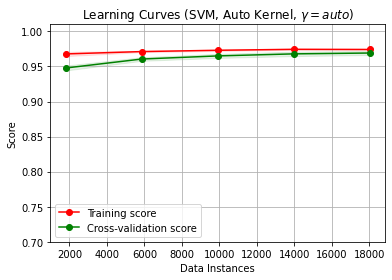

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Data Instances")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
X, y = df3, target


title = "Learning Curves (SVM, Auto Kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm# SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

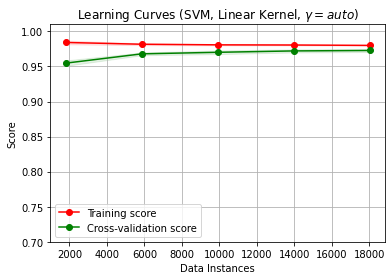

In [ ]:
title = "Learning Curves (SVM, Linear Kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svml# SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

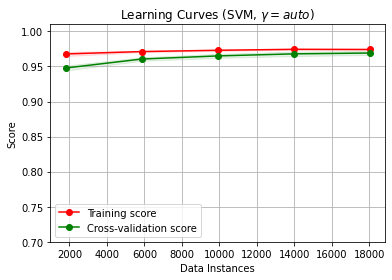

In [ ]:
title = "Learning Curves (SVM, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm# SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

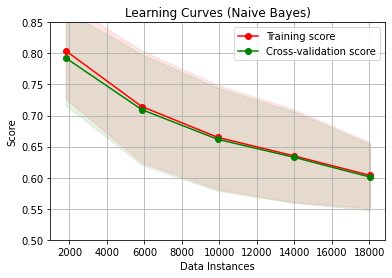

In [ ]:

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.85), cv=cv, n_jobs=4)
plt.show()

In [ ]:
from sklearn import svm, datasets

classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

## COnfusion Matrix, F1-Score, Recall, Accuracy

In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix
confusion_matrix(y_test,y_pred1)



array([[243,   2,   0, ...,   0,   0,   0],
       [  2, 103,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 332,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   0,   1]])

In [ ]:
print(classification_report(y_test,y_pred1))

                 precision    recall  f1-score   support

        apache2       0.98      0.99      0.99       245
           back       0.98      0.98      0.98       105
buffer_overflow       1.00      0.20      0.33         5
   guess_passwd       0.93      0.99      0.96       401
     httptunnel       0.91      1.00      0.95        49
        ipsweep       0.95      1.00      0.98        42
           land       1.00      1.00      1.00         1
     loadmodule       0.00      0.00      0.00         1
       mailbomb       0.97      0.67      0.79        88
          mscan       0.99      0.99      0.99       342
       multihop       0.00      0.00      0.00         6
          named       0.00      0.00      0.00         3
        neptune       1.00      1.00      1.00      1556
           nmap       1.00      1.00      1.00        26
         normal       0.99      0.99      0.99      3210
            phf       0.00      0.00      0.00         1
            pod       0.89    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred1, output_dict=True)
pd.DataFrame(report_dict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,apache2,back,buffer_overflow,guess_passwd,httptunnel,ipsweep,land,loadmodule,mailbomb,mscan,multihop,named,neptune,nmap,normal,phf,pod,portsweep,processtable,ps,rootkit,saint,satan,sendmail,smurf,snmpgetattack,snmpguess,sqlattack,teardrop,warezmaster,xlock,xterm,accuracy,macro avg,weighted avg
precision,0.983806,0.980952,1.000000,0.925581,0.907407,0.954545,1.0,0.0,0.967213,0.988372,0.0,0.0,1.000000,1.0,0.990915,0.0,0.888889,1.00000,0.995708,1.000000,0.0,0.928571,0.767123,0.666667,0.994975,0.928571,0.784173,0.0,0.0,0.956772,0.0,0.333333,0.971774,0.685737,0.971775
recall,0.991837,0.980952,0.200000,0.992519,1.000000,1.000000,1.0,0.0,0.670455,0.994152,0.0,0.0,0.999357,1.0,0.985358,0.0,1.000000,0.88000,1.000000,0.200000,0.0,0.262626,0.991150,0.400000,0.994975,0.984848,0.981982,0.0,0.0,0.985163,0.0,0.500000,0.971774,0.624855,0.971774
f1-score,0.987805,0.980952,0.333333,0.957882,0.951456,0.976744,1.0,0.0,0.791946,0.991254,0.0,0.0,0.999679,1.0,0.988129,0.0,0.941176,0.93617,0.997849,0.333333,0.0,0.409449,0.864865,0.500000,0.994975,0.955882,0.872000,0.0,0.0,0.970760,0.0,0.400000,0.971774,0.629239,0.967861
support,245.000000,105.000000,5.000000,401.000000,49.000000,42.000000,1.0,1.0,88.000000,342.000000,6.0,3.0,1556.000000,26.0,3210.000000,1.0,16.000000,50.00000,232.000000,5.000000,3.0,99.000000,226.000000,5.000000,199.000000,66.000000,111.000000,2.0,3.0,337.000000,3.0,2.000000,0.971774,7440.000000,7440.000000


In [ ]:
compare_scores = pandas.DataFrame(report_dict).transpose()

In [ ]:
compare_scores

,precision,recall,f1-score,support
apache2,0.983806,0.991837,0.987805,245.000000
back,0.980952,0.980952,0.980952,105.000000
buffer_overflow,1.000000,0.200000,0.333333,5.000000
guess_passwd,0.925581,0.992519,0.957882,401.000000
httptunnel,0.907407,1.000000,0.951456,49.000000
ipsweep,0.954545,1.000000,0.976744,42.000000
land,1.000000,1.000000,1.000000,1.000000
loadmodule,0.000000,0.000000,0.000000,1.000000
mailbomb,0.967213,0.670455,0.791946,88.000000
mscan,0.988372,0.994152,0.991254,342.000000


In [ ]:
pandas.DataFrame.to_csv(compare_scores)

',precision,recall,f1-score,support\napache2,0.9838056680161943,0.9918367346938776,0.9878048780487805,245.0\nback,0.9809523809523809,0.9809523809523809,0.9809523809523809,105.0\nbuffer_overflow,1.0,0.2,0.33333333333333337,5.0\nguess_passwd,0.9255813953488372,0.9925187032418953,0.9578820697954273,401.0\nhttptunnel,0.9074074074074074,1.0,0.9514563106796117,49.0\nipsweep,0.9545454545454546,1.0,0.9767441860465117,42.0\nland,1.0,1.0,1.0,1.0\nloadmodule,0.0,0.0,0.0,1.0\nmailbomb,0.9672131147540983,0.6704545454545454,0.7919463087248322,88.0\nmscan,0.9883720930232558,0.9941520467836257,0.9912536443148688,342.0\nmultihop,0.0,0.0,0.0,6.0\nnamed,0.0,0.0,0.0,3.0\nneptune,1.0,0.9993573264781491,0.9996785599485696,1556.0\nnmap,1.0,1.0,1.0,26.0\nnormal,0.9909147869674185,0.9853582554517134,0.9881287097781943,3210.0\nphf,0.0,0.0,0.0,1.0\npod,0.8888888888888888,1.0,0.9411764705882353,16.0\nportsweep,1.0,0.88,0.9361702127659575,50.0\nprocesstable,0.9957081545064378,1.0,0.9978494623655914,232.0\nps,1.0,0

**Saving the F1,Accuracy, Recall to CSV on Drive**



In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
compare_scores.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred1)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))